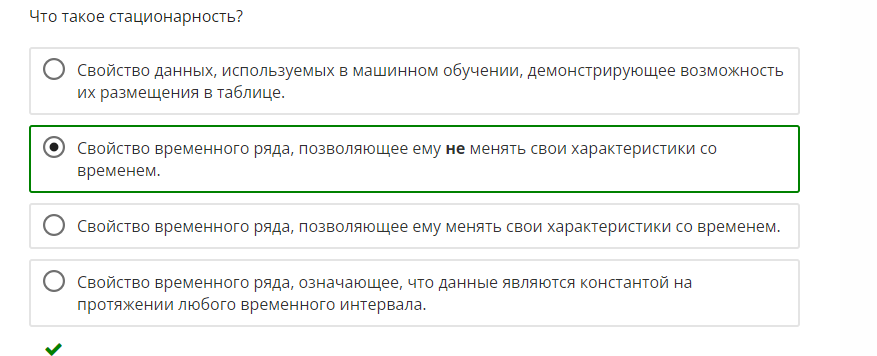

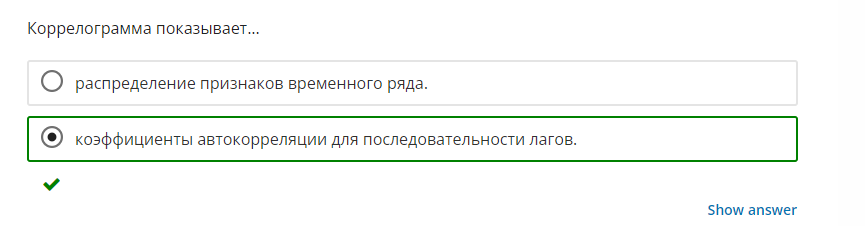

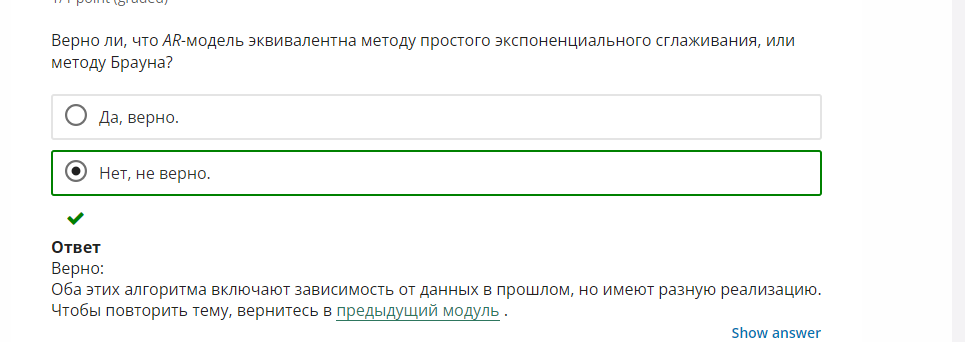

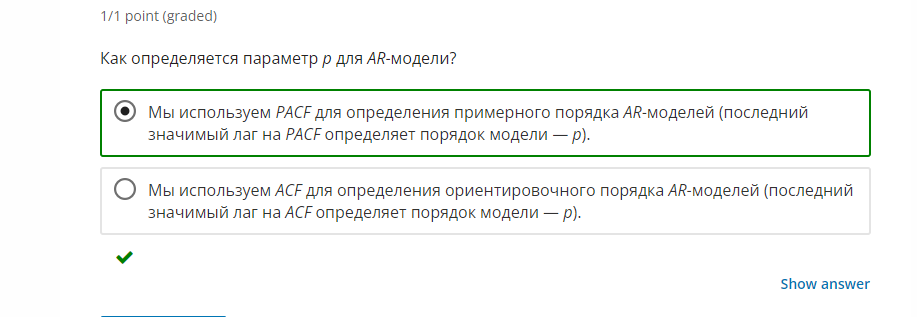

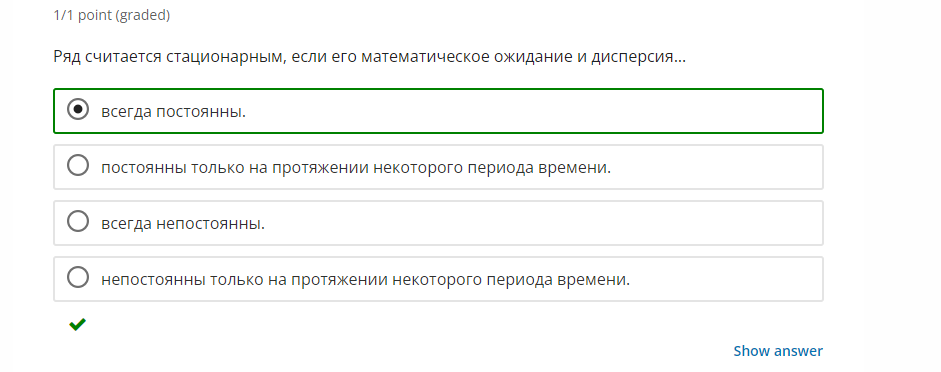

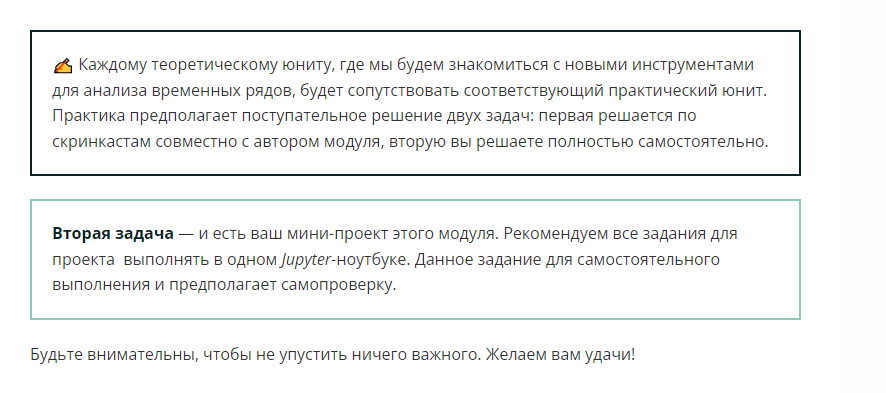

Разные статистические модели прогнозирования тесно связаны друг с другом: в целях улучшения результата более простые подходы расширялись и становились основой для более сложных. В итоге в статистике появилось несколько методов прогнозирования, отличающихся между собой деталями, которые мы рассмотрим в этом юните.

СКОЛЬЗЯЩЕЕ СРЕДНЕЕ

Помимо простого экспоненциального сглаживания, есть также простое сглаживание, или скользящее среднее.

Для получения элементарного случая скользящего среднего проще всего взять среднее арифметическое двух последних наблюдений. Мы получим новый временной ряд, каждый член которого — среднее арифметическое двух соседних значений исходного ряда:



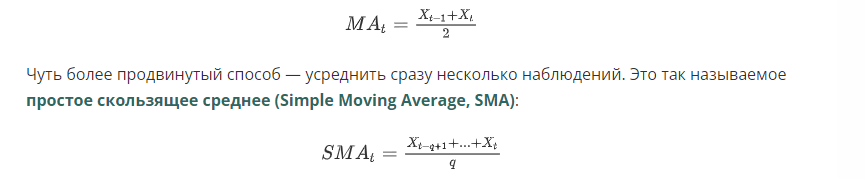

Таким образом, в скользящем среднем мы суммируем несколько последовательных точек временного ряда и делим эту сумму на количество самих точек, то есть считаем математическое усреднение за определённый период.

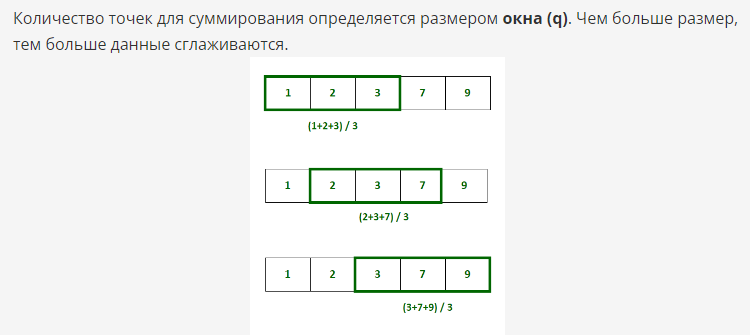

Для сглаживания мы будем использовать встроенный метод pandas.Series.rolling() — он принимает на вход параметр window и ожидает после себя агрегирующую функцию для сглаживания (обычно используется среднее). Из преимуществ этого метода можно отметить простоту реализации и интерпретации, из недостатков — чувствительность.

Посмотрим на некоторый временной ряд и результаты применения сглаживания к нему:

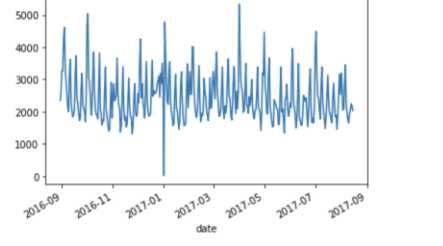

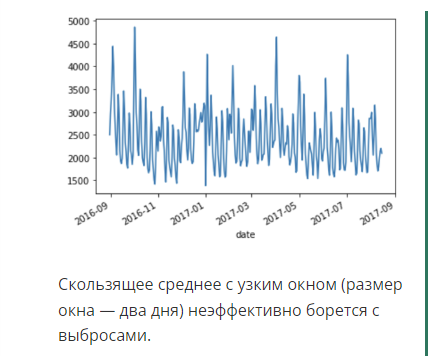

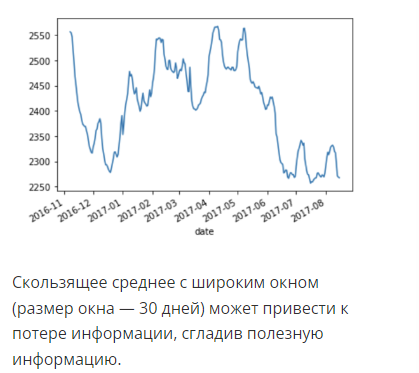

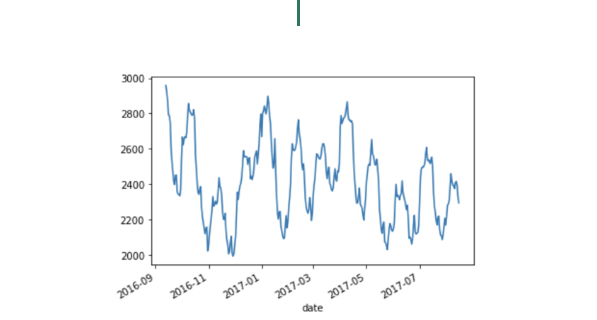

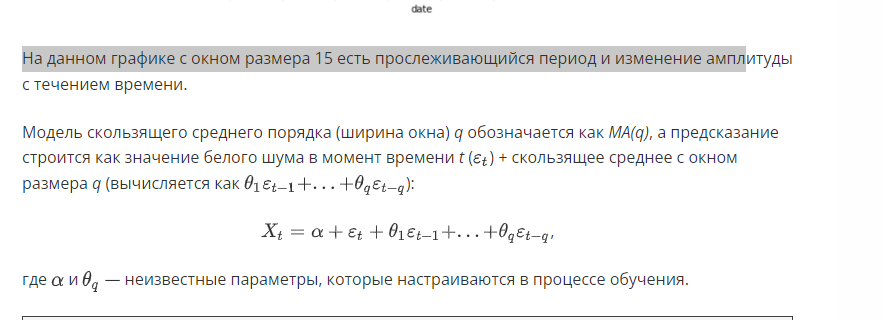

Скользящее среднее редко используется как самостоятельная модель, но иногда помогает избавить ряд от выбросов и лишнего шума, чтобы упростить визуальный анализ.

ARMA И ARIMA

Что получится, если объединить некоторые из изученных нами методов? Уже есть предположения, что такое ARMA?

Если вы внимательно следили за ходом событий, то смогли догадаться, что ARMA — это авторегрессионное скользящее среднее, или модель авторегрессии-скользящего среднего. В ней p авторегрессионных слагаемых и q слагаемых скользящего среднего шумовой компоненты:



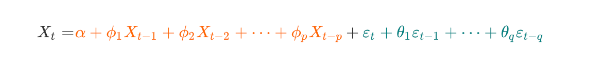

Таким образом ARMA объединяет преимущества двух ранее изученных методов и имеет два параметра:

p — параметр авторегрессионной модели (AR(p));
q — параметр скользящего среднего (MA(q)).

Параметр p мы определяли по графику частичной автокорреляции. Параметр q для скользящего среднего определяют так же, но по коррелограмме (графику автокорреляции).

«Было бы здорово применить всё это и для временных рядов, которые не являются стационарными», — подумали Дж. Бокс и Г. Дженкинс и расширили модель ARMA до ARIMA.

ARIMA расшифровывается как Autoregressive Integrated Moving Average и включает в себя ещё один параметр (d), который означает, что дифференцирование временного ряда порядка d приводит ряд к стационарности и будет подчиняться модели ARMA.

d — это порядок дифференцирования, который приводит нестационарный ряд к стационарности. Это значит, что даже если наш ряд нестационарный, мы можем сделать его стационарным путём взятия разностей. Запомнив получившееся количество дифференцирований, можно смело применять к нему ARIMA.

И ARMA, и ARIMA реализованы на Python в классе ARIMA из statsmodels. Данному классу необходимо передать в качестве параметров временной ряд и порядок order (ARIMA(dta, order=(2, 0, 0))). Для параметра order нужно указать p, d и q (именно в таком порядке), причём для получения ARMA необходимо указать d=0.

Резюмируем:

Если ряд стационарный, используем ARMA.
Если ряд нестационарный (имеет тренд), с помощью дифференцирования определяем порядок d и используем ARIMA.
Теперь мы можем проверять временные ряды из задач на стационарность и вне зависимости от результата применять к ним одну из статистических моделей.

SARIMA

Модель ARIMA отлично учитывает и тренд (благодаря скользящему среднему), и зависимость от предыдущих значений (благодаря авторегрессии), но в ней не хватает учёта сезонности. В таком случае можно добавить к ARIMA учёт сезонности, и тогда мы получим следующую модель — сезонную ARIMA, или SARIMA (Seasonal ARIMA).

Эта модель очень похожа на ARIMA, за исключением того, что в ней есть дополнительный набор компонентов авторегрессии и скользящего среднего.



SARIMA позволяет различать данные по сезонной частоте, а также по их несезонным отличиям. Нахождение лучших для модели параметров можно упростить с помощью средств автоматического поиска, таких как auto_arima из pmdarima.

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

SARIMAX И ARIMAX

Вы уже могли заметить, что изученные нами статистические модели совершают предсказания, основываясь только на данных самого временного ряда. Но что если месяц или день недели тоже имеет значение? Или, например, на курс рубля, помимо даты и предыдущих значений, также влияют курсы других валют?

Последней статистической моделью, с которой мы познакомимся, будет SARIMAX. Её отличие от предыдущей версии заключается в том, что, помимо данных временного ряда, она учитывает экзогенные переменные. Таким образом мы сможем учитывать не только зависимости внутри данных, но и внешние факторы.

Для запуска моделей SARIMA и SARIMAX на Python нужно воспользоваться классом SARIMAX. Если вы хотите использовать SARIMA, необходимо задать два обязательных параметра — order и seasonal_order.



order — это порядок для модели (ARIMA(p, d, q)). В seasonal_order необходимо передать ещё четыре параметра:


P — сезонный авторегрессионный порядок;


Q — порядок сезонной скользящей средней;

m — размер сезонного периода.

Если размер сезонного периода m можно определить по сезонной компоненте (мы уже раскладывали ряд на компоненты ранее — seasonal_decompose), то остальные параметры удобнее определять автоперебором (мы применим этот способ на практике в следующем юните).


Для учёта экзогенных переменных необходимо передать в класс SARIMAX параметр exog=x. В x должны находиться другие временные ряды, например курс доллара (x), который может влиять на курс рубля (y), или пометка, является ли каждая из дат праздничным днём.


Хороший пример реализации SARIMAХ приведён в официальной документации.

https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_sarimax_faq.html

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

rng = np.random.default_rng(20210819)
eta = rng.standard_normal(5200)
rho = 0.8
beta = 10
epsilon = eta.copy()
for i in range(1, eta.shape[0]):
    epsilon[i] = rho * epsilon[i - 1] + eta[i]
y = beta + epsilon
y = y[200:]

In [2]:
y

array([ 8.58889456,  8.1867818 ,  6.96038819, ..., 11.4543393 ,
       11.91982712, 10.88144125])

In [3]:
from statsmodels.tsa.api import SARIMAX, AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [4]:
ar0_res = SARIMAX(y, order=(0, 0, 0), trend="c").fit()
sarimax_res = SARIMAX(y, order=(1, 0, 0), trend="c").fit()
arima_res = ARIMA(y, order=(1, 0, 0), trend="c").fit()
autoreg_res = AutoReg(y, 1, trend="c").fit()

In [7]:
ar0_res.params

array([9.77450015, 2.71101244])

In [5]:
intercept = [
    ar0_res.params[0],
    sarimax_res.params[0],
    arima_res.params[0],
    autoreg_res.params[0],
]
rho_hat = [0] + [r.params[1] for r in (sarimax_res, arima_res, autoreg_res)]
long_run = [
    ar0_res.params[0],
    sarimax_res.params[0] / (1 - sarimax_res.params[1]),
    arima_res.params[0],
    autoreg_res.params[0] / (1 - autoreg_res.params[1]),
]
cols = ["AR(0)", "SARIMAX", "ARIMA", "AutoReg"]
pd.DataFrame(
    [intercept, rho_hat, long_run],
    columns=cols,
    index=["delta-or-phi", "rho", "long-run mean"],
)

,AR(0),SARIMAX,ARIMA,AutoReg
delta-or-phi,9.7745,1.985714,9.774498,1.985790
rho,0.0000,0.796846,0.796875,0.796882
long-run mean,9.7745,9.774424,9.774498,9.776537


Обратите внимание, что также существует модель ARIMAX. Уже есть предположения, когда использовать эту модель? В отличие от SARIMAX, ARIMAX не учитывает сезонную составляющую, но имеет все преимущества ARIMA и учитывает экзогенные переменные.

КАК СРАВНИВАТЬ ЭТИ МОДЕЛИ?

Одним из распространённых способов является сравнение качества моделей по критерию Акаике (AIC). Этот информационный критерий вознаграждает модель за качество приближения обученного временного ряда к фактическому, а также «штрафует» её за использование излишнего количества параметров. Принято считать, что модель с наименьшим значением критерия AIC является наилучшей.


Для оценки модели критерием AIC необязательно пользоваться дополнительными методами. Этот критерий, как и другая информация, отображается после обучения модели при вызове встроенного метода fit_model.summary().

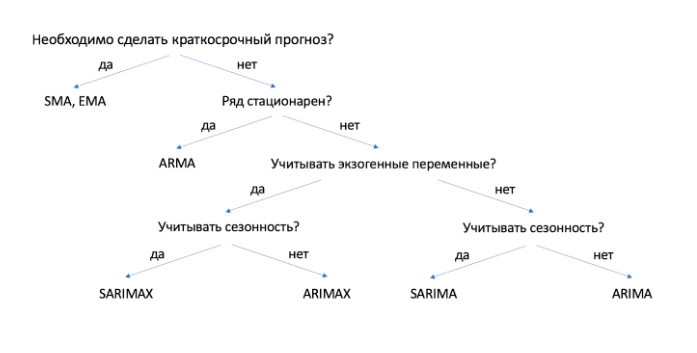

Итак, мы познакомились с самыми популярными статистическими подходами для анализа временных рядов — давайте перейдём к практике и посмотрим на эти инструменты в действии.

https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

https://www.8host.com/blog/prognozirovanie-vremennyx-ryadov-s-pomoshhyu-arima-v-python-3/

In [8]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Для работы мы используем набор данных «Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.», в котором находятся данные о CO2 с марта 1958 года по декабрь 2001 года. Загрузите эти данные в документ:

In [9]:
data = sm.datasets.co2.load_pandas()
y = data.data



In [10]:
y

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


Прежде чем продолжить, предварительно обработайте данные. С данными за неделю сложнее работать, так как это более короткий промежуток времени; поэтому лучше использовать средние данные за месяц. Преобразуйте данные с помощью функции resample. Также можно использовать функцию fillna (), чтобы заполнить пропущенные значения во временных рядах.

In [11]:
 y['co2'].resample('MS').mean()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

In [12]:
# 'MS' группирует месячные данные
y = y['co2'].resample('MS').mean()
# bfill значит, что нужно использовать значение до заполнения пропущенных значений
y = y.fillna(y.bfill())
print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


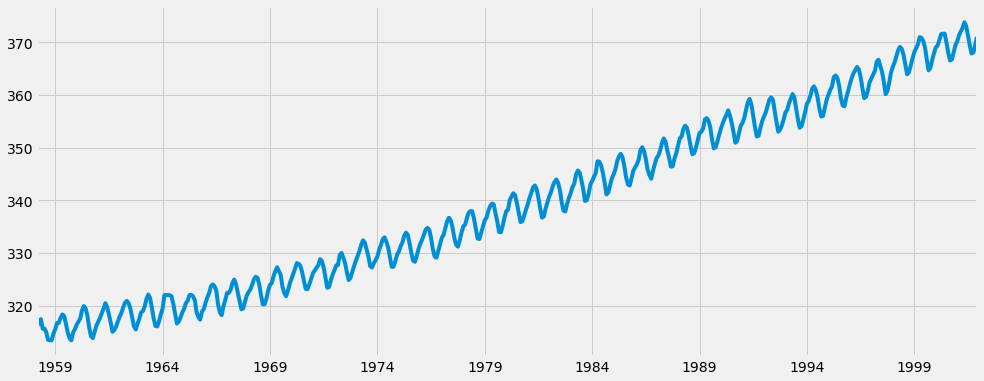

In [13]:
y.plot(figsize=(15, 6))
plt.show()

Модель ARIMA (AutoregRessive Integrated Moving Average) – один из наиболее распространённых методов анализа и прогнозирования временных рядов. Эта модель позволяет обработать данные временного ряда, чтобы лучше понять этот ряд или предсказать его развитие.

ARIMA использует три основных параметра (p, d, q), которые выражаются целыми числами. Потому модель также записывается как ARIMA(p, d, q). Вместе эти три параметра учитывают сезонность, тенденцию и шум в наборах данных:

p – порядок авторегрессии (AR), который позволяет добавить предыдущие значения временного ряда. Этот параметр можно проиллюстрировать утверждением «завтра, вероятно, будет тепло, если в последние три дня было тепло».

d – порядок интегрирования (I; т. е. порядок разностей исходного временного ряда). Он добавляет в модель понятия разности временных рядов (определяет количество прошлых временных точек, которые нужно вычесть из текущего значения). Этот параметр иллюстрирует такое утверждение: «завтра, вероятно, будет такая же температура, если разница в температуре за последние три дня была очень мала».


q – порядок скользящего среднего (MA), который позволяет установить погрешность модели как линейную комбинацию наблюдавшихся ранее значений ошибок.

Для отслеживания сезонности используется сезонная модель ARIMA – ARIMA(p,d,q)(P,D,Q)s. Здесь (p, d, q) – несезонные параметры, описанные выше, а (P, D, Q) следуют тем же определениям, но применяются к сезонной составляющей временного ряда. Параметр s определяет периодичность временного ряда (4 – квартальные периоды, 12 – годовые периоды и т.д.).

Подбор параметров для модели ARIMA

Главное при подборе данных временных рядов в сезонной модели ARIMA – найти значения ARIMA (p, d, q) (P, D, Q) s, которые оптимизируют требуемый показатель. Для достижения этой цели существует множество руководств и передовых методов; правильная параметризация моделей ARIMA вручную –  процесс довольно кропотливый, требует экспертизы домена и занимает много времени. Другие статистические языки программирования (например, R) предоставляют автоматизированные способы решения этой проблемы, но они еще не доступны в Python.

В этом разделе руководства показано, как написать сценарий Python для подбора оптимальных значений параметров модели временного ряда ARIMA (p, d, q) (P, D, Q).

Чтобы итерировать различные комбинации параметров, используйте сеточный поиск.

Для каждой комбинации параметров функция  SARIMAX () из модуля statsmodels может подобрать новую сезонную модель ARIMA и оценить ее общее качество. Оптимальным набором параметров будет тот, в котором нужные критерии наиболее производительны. Для начала сгенерируйте различные комбинации параметров:

In [14]:
# Определите p, d и q в диапазоне 0-2
p = d = q = range(0, 2)
# Сгенерируйте различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируйте комбинации сезонных параметров p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
 list(itertools.product(p, d, q))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [17]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

Теперь можно использовать определенные выше триплеты параметров для автоматизации процесса оценки моделей ARIMA по различным комбинациям. В статистике и машинном обучении этот процесс известен как поиск по сетке параметров (сетчатый поиск, или оптимизация гиперпараметров).

При оценке и сравнении статистических моделей, соответствующих различным параметрам, учитывается, насколько та или иная модель соответствует данным и насколько точно она способна прогнозировать будущие точки данных. Используйте значение AIC (Akaike Information Criterion), которое подходит для работы с моделями ARIMA на основе statsmodels. AIC оценивает, насколько хорошо модель соответствует данным, принимая во внимание общую сложность модели. Чем меньше функций использует модель, чтобы достичь соответствия данным, тем выше её показатель AIC. Поэтому нужно найти модель с наименьшим значением AIC.

Предложенный ниже код итерирует комбинации параметров и использует функцию SARIMAX из statsmodels, чтобы найти соответствия с сезонной моделью ARIMA. Аргумент order определяет параметры (p, d, q), а аргумент seasonal_order указывает сезонный компонент модели ARIMA (P, D, Q, S). После проверки каждой модели SARIMAX () на экране появится рейтинг значений AIC.

In [16]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
   for param_seasonal in seasonal_pdq:
     mod = sm.tsa.statespace.SARIMAX(y,
                                     order=param,
                                     seasonal_order=param_seasonal,
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)
     results = mod.fit()
     print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))



ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.34362404079
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.8282341411787
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727636975
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.938892132007
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878382366332
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.657897807711
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912841048
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048755640422
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327706686
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067057987
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716833727
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1111.7818109833097
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:801.4642720185643
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893610284
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.09129881839
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024289
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194037
ARI

Согласно полученному выводу, SARIMAX(1, 1, 1)x(1, 1, 1, 12) получает наименьший показатель AIC (277.78). Следовательно, эти параметры можно считать оптимальными.

Используя поиск по сетке, вы определили оптимальный набор параметров для сезонной модели данных временного ряда. Эту модель можно проанализировать более подробно.

Добавьте оптимальные параметры в модель SARIMAX:

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.441      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.162      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.811      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


Атрибут summary возвращает много информации, но мы сосредоточим наше внимание на таблице коэффициентов. Столбец coef определяет важность каждого параметра и его влияние на временной ряд. Столбец P>|z| сообщает значимость каждого параметра. Здесь вес (важность) каждого параметра p имеет близкое к 0,05 значение, поэтому разумно сохранить в модели все параметры.

При подборе сезонных моделей ARIMA (как, впрочем, и любых других моделей), важно проводить диагностику модели, чтобы убедиться, что ни одно из предположений, сделанных моделью, не было нарушено. Объект plot_diagnostics позволяет быстро провести диагностику модели и исследовать любое необычное поведение.

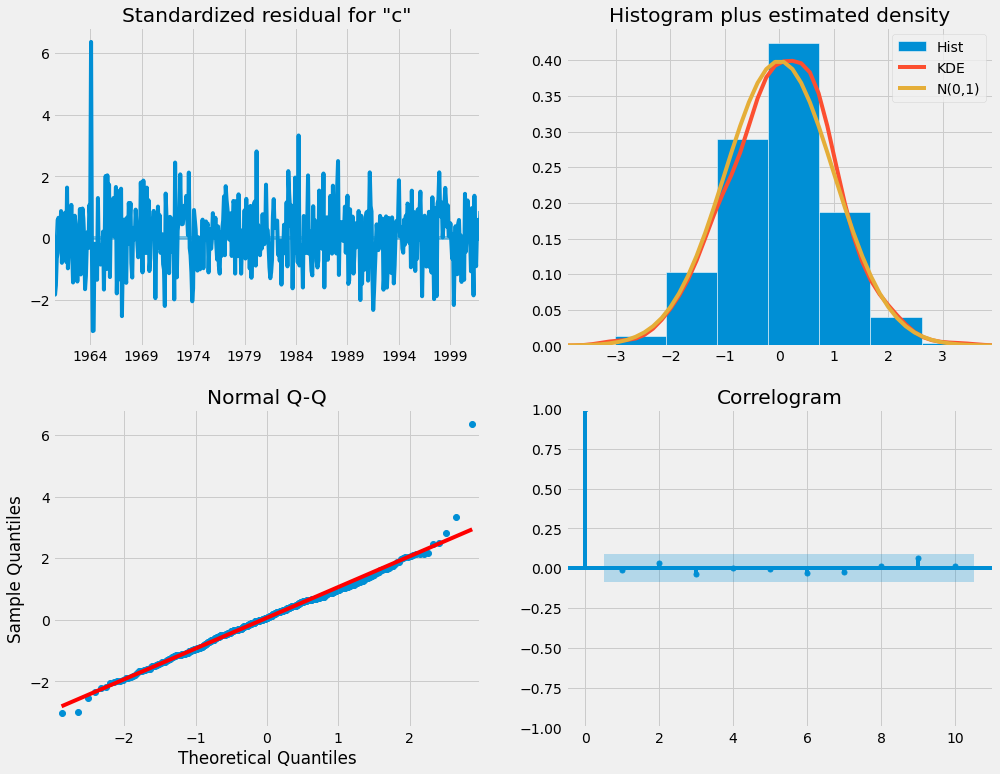

In [19]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

На экране появятся несколько графиков. Главная задача – убедиться, что остатки модели некоррелированные и распределяются с нулевым средним значением. Если сезонная модель ARIMA не удовлетворяет этим свойствам, это значит, что ее еще можно улучшить.

 этом случае диагностика показала, что остатки модели правильно распределяются:

На верхнем правом графике красная линия KDE находится близко к линии N (0,1) (где N (0,1) является стандартным обозначением нормального распределения со средним 0 и стандартным отклонением 1) . Это хороший признак того, что остатки нормально распределены.


График q-q в левом нижнем углу показывает, что упорядоченное распределение остатков (синие точки) следует линейному тренду выборок, взятых из стандартного распределения N (0, 1). Опять же, это признак того, что остатки нормально распределены.


Остатки с течением времени (верхний левый график) не показывают явной сезонности и кажутся белыми шумами. Это подтверждается графиком автокорреляции (внизу справа), который показывает, что остатки временных рядов имеют низкую корреляцию с запаздывающими данными.

Эти графики позволяют сделать вывод о том, что выбранная модель (удовлетворительно) подходит для анализа и прогнозирования данных временных рядов.

Мы выбрали удовлетворительную модель, однако некоторые параметры сезонной модели ARIMA можно улучшить. Например, сетчатый поиск рассматривает ограниченный набор комбинаций параметров; чтобы найти лучшую модель, можно расширить поиск.

Прогнозирование временных рядов
Теперь у вас есть модель временных рядов, с помощью которой можно спрогнозировать данные.

Для начала нужно сравнить прогнозируемые значения с реальными значениями временного ряда, что поможет нам понять точность прогнозов. Атрибуты get_prediction () и conf_int () позволяют получать значения и интервалы для прогнозов временных рядов.

In [21]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [22]:
pred_ci

,lower co2,upper co2
1998-01-01,364.453366,365.675241
1998-02-01,365.373503,366.595378
1998-03-01,366.404744,367.626619
1998-04-01,367.908502,369.130376
1998-05-01,368.389525,369.611398
1998-06-01,367.802555,369.024429
1998-07-01,366.481985,367.703859
1998-08-01,364.754334,365.976208
1998-09-01,363.200086,364.421959
1998-10-01,363.378481,364.600354


Данный код начнёт прогнозирование с января 1998.

Аргумент dynamic=False включает пошаговое прогнозирование, а это означает, что прогнозы в каждой точке генерируются с использованием полной истории вплоть до этой точки.

Визуализируйте реальные и прогнозируемые значения временного ряда CO2, чтобы оценить, как всё работает. Обратите внимание, в конце временного ряда нужно изменить масштаб, для этого создаётся срез индекса даты.

In [23]:
pred.predicted_mean

1998-01-01    365.064303
1998-02-01    365.984440
1998-03-01    367.015682
1998-04-01    368.519439
1998-05-01    369.000462
1998-06-01    368.413492
1998-07-01    367.092922
1998-08-01    365.365271
1998-09-01    363.811022
1998-10-01    363.989418
1998-11-01    365.530676
1998-12-01    366.910343
1999-01-01    367.971101
1999-02-01    368.882458
1999-03-01    369.807509
1999-04-01    370.935992
1999-05-01    371.518317
1999-06-01    370.417747
1999-07-01    368.880874
1999-08-01    366.980757
1999-09-01    365.042029
1999-10-01    364.998633
1999-11-01    366.467885
1999-12-01    367.997582
2000-01-01    368.993980
2000-02-01    369.819827
2000-03-01    370.447677
2000-04-01    371.744652
2000-05-01    372.073631
2000-06-01    371.178028
2000-07-01    370.078737
2000-08-01    367.899516
2000-09-01    366.159838
2000-10-01    366.637810
2000-11-01    368.009468
2000-12-01    369.452984
2001-01-01    370.512436
2001-02-01    371.022535
2001-03-01    372.212016
2001-04-01    373.355806


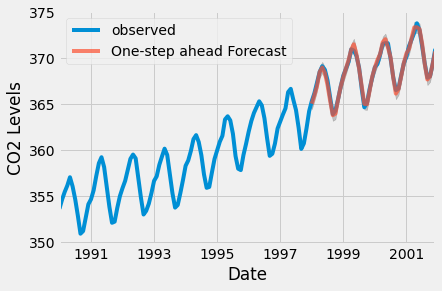

In [24]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

В целом, прогнозы соответствуют истинным значениям, демонстрируя общий тренд на увеличение.

Также полезно оценить точность наших прогнозов. Для этого можно использовать MSE (Mean Squared Error), что суммирует среднюю ошибку прогнозов. Для каждого прогнозируемого значения нужно вычислить его расстояние до истинного значения. Результаты нужно возводить в квадрат, чтобы различия не компенсировали друг друга при вычислении общего среднего

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':] # Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 0.07


MSE прогнозов на один шаг вперед дает значение 0,07 (это очень низкое значение, так как оно близко к 0). MSE 0 означает, что прогноз составлен с идеальной точностью. К этому результату и нужно стремиться, но его не всегда возможно достичь.

Более точное представление точности прогнозирования может быть получено с помощью динамических прогнозов. В этом случае нужно использовать только информацию из временных рядов до определенной точки; затем прогнозы сгенерируются с помощью значений из предыдущих прогнозируемых временных точек.

Данный код начнёт динамическое прогнозирование с января 1998 года.


In [37]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [38]:
pred_dynamic_ci

,lower co2,upper co2
1998-01-01,364.453366,365.675241
1998-02-01,365.050232,366.536665
1998-03-01,365.874956,367.529661
1998-04-01,367.090573,368.883005
1998-05-01,367.550514,369.466514
1998-06-01,366.824202,368.854991
1998-07-01,365.234708,367.373752
1998-08-01,363.143038,365.385000
1998-09-01,361.355753,363.696076
1998-10-01,361.462364,363.897066


Отобразив существующие и прогнозируемые значения временного ряда, обратите внимание: общие прогнозы точны даже при динамическом построении. Все прогнозируемые значения (красная линия) очень близко находятся к реальным (синяя линия), а значит, соответствуют истине. Кроме того, они находятся в пределах интервалов.

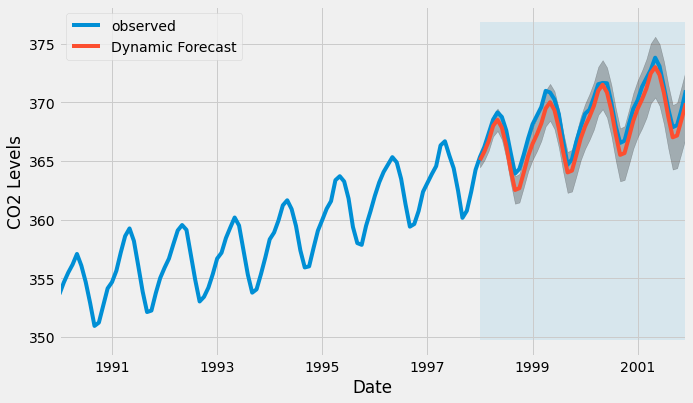

In [39]:
ax = y['1990':].plot(label='observed', figsize=(10, 6))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
pred_dynamic_ci.iloc[:, 0],
pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [40]:
# Извлечь прогнозируемые и истинные значения временного ряда
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':] # Вычислить среднеквадратичную ошибку
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [41]:
y_forecasted

1998-01-01    365.064303
1998-02-01    365.793449
1998-03-01    366.702308
1998-04-01    367.986789
1998-05-01    368.508514
1998-06-01    367.839597
1998-07-01    366.304230
1998-08-01    364.264019
1998-09-01    362.525915
1998-10-01    362.679715
1998-11-01    364.020397
1998-12-01    365.428039
1999-01-01    366.459482
1999-02-01    367.257672
1999-03-01    368.188719
1999-04-01    369.479730
1999-05-01    370.003839
1999-06-01    369.336143
1999-07-01    367.800584
1999-08-01    365.760325
1999-09-01    364.022792
1999-10-01    364.176171
1999-11-01    365.516578
1999-12-01    366.923778
2000-01-01    367.955430
2000-02-01    368.753686
2000-03-01    369.684754
2000-04-01    370.975771
2000-05-01    371.499883
2000-06-01    370.832188
2000-07-01    369.296629
2000-08-01    367.256369
2000-09-01    365.518837
2000-10-01    365.672216
2000-11-01    367.012623
2000-12-01    368.419822
2001-01-01    369.451474
2001-02-01    370.249730
2001-03-01    371.180798
2001-04-01    372.471816


Прогнозируемые данные вернули MSE 1.01. Это немного больше, чем в предыдущем разделе (чего следовало ожидать, учитывая, что здесь используются менее точные данные временных рядов).

Как пошаговый прогноз, так и динамические прогнозы подтверждают, что эта модель временного ряда работает. Теперь можно попробовать спрогнозировать будущие значения ряда.

 Создание и визуализация прогноза
 
Теперь можно использовать модель ARIMA для прогнозирования будущих значений.

Атрибут get_forecast() объекта временного ряда может вычислить значения на указанное количество шагов.

In [42]:
# Получить прогноз на 500 шагов вперёд
pred_uc = results.get_forecast(steps=500)
# Получить интервал прогноза
pred_ci = pred_uc.conf_int()

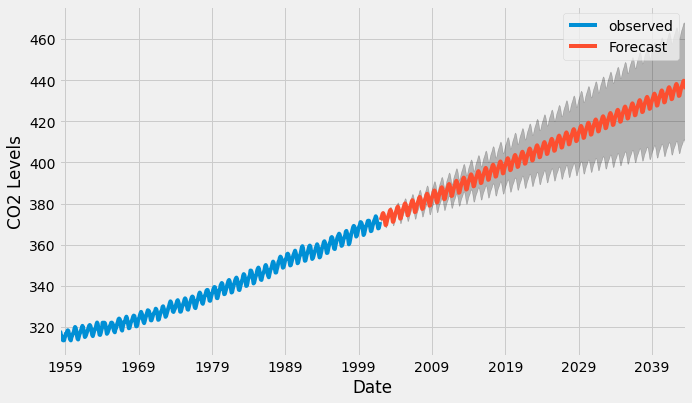

In [43]:
ax = y.plot(label='observed', figsize=(10, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [44]:
pred_uc.predicted_mean

2002-01-01    371.977653
2002-02-01    372.749094
2002-03-01    373.662305
2002-04-01    374.859619
2002-05-01    375.345754
                 ...    
2043-04-01    439.258737
2043-05-01    439.745120
2043-06-01    439.168361
2043-07-01    437.648018
2043-08-01    435.622258
Freq: MS, Name: predicted_mean, Length: 500, dtype: float64

И сгенерированные прогнозы, и связанный с ними интервал теперь можно использовать для дальнейшего анализа и прогнозирования временных рядов. Полученные данные показывают, что временные ряды будут продолжать стабильный рост.

Конечно, чем дальше строится прогноз, тем менее точны его значения. Это отражается на интервалах, генерируемых моделью (чем дальше прогноз, тем больше интервал).

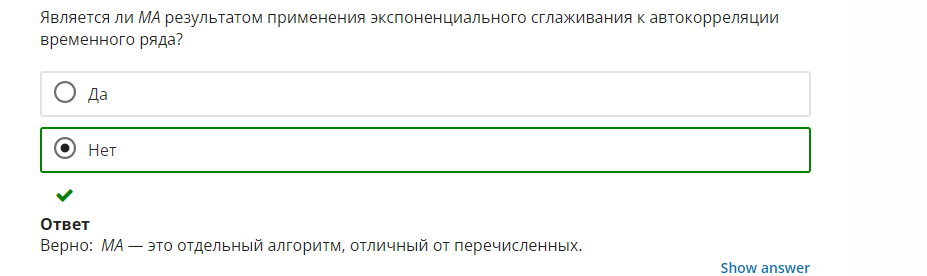

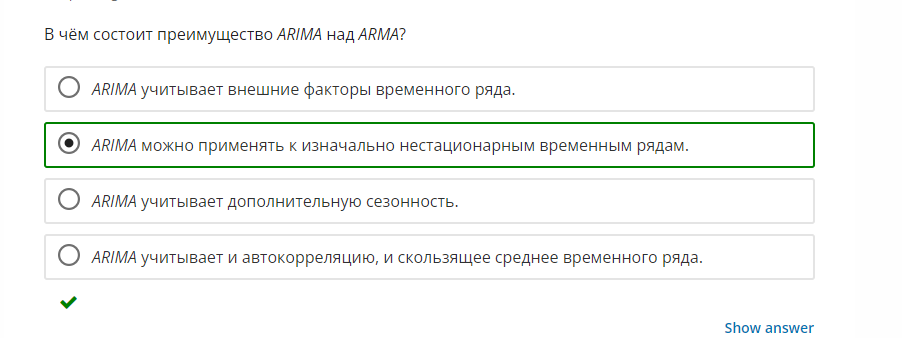

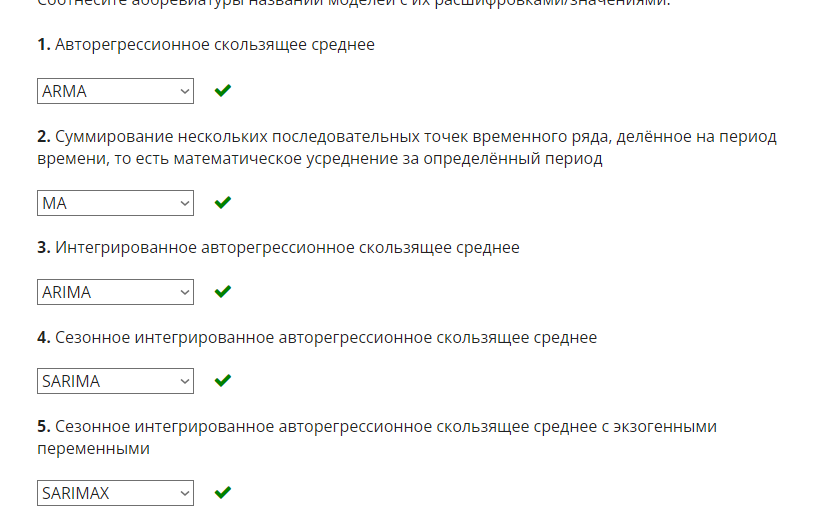

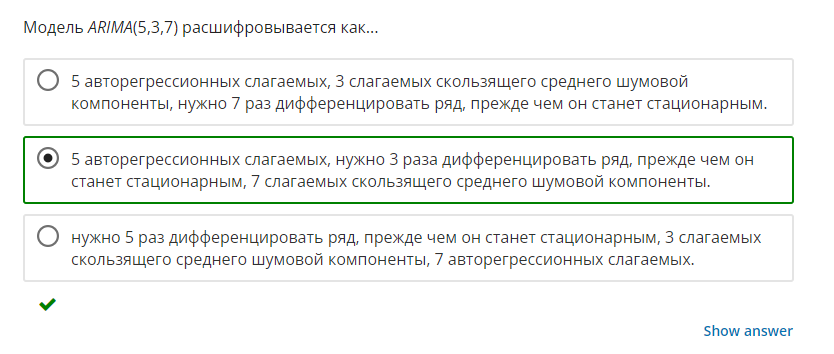